<a href="https://colab.research.google.com/github/Tomas-Ausensi/Entregables_MAT281/blob/master/docs/labs/lab_5_tomas_ausensi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°05



## Problema 01
<img src="https://drive.google.com/uc?export=view&id=1Ha4ZjgvrlWHQ5vV_VydBkxiFXdgDn8TT" width = "200" align="center"/>


El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
data = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_05/data/iris_contaminados.csv")
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**:
    * Descripción: Nombre de la especie de Iris.
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**:
    * Descripción: largo del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**:
    * Descripción: ancho del sépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**:
    * Descripción: largo del pétalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**:
    * Descripción: ancho del pépalo.
    * Tipo de dato: *float*.
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores `nan`.

In [4]:
data['species'].unique()
#Primero se observan los distintos valores para la columna 'species'
#A partir de esto, la idea es quedarnos solo con los 3 valores pertenecientes
#a la cantidad de especies, usando los métodos .str.lower y .str.replace

array(['setosa', ' virginica', 'VIRGINICA', 'virginica', 'virginica ',
       'versicolor', 'Versicolor', 'VERSICOLOR', nan, 'Setosa', 'SETOSA'],
      dtype=object)

In [5]:
data['species'].count()
#Esto es para corroborar que, después del reemplazo, no se hayan perdido datos

149

In [6]:
data['species'] = data['species'].str.lower().str.replace(' ', '').fillna('default')
data['species'].unique()


array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

In [7]:
data['species'].count()

150

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

In [8]:
nan_df = data[data.isna().any(axis=1)] #axis=1 is by columns
display(nan_df.head(5))
#Acá están los valores nulos por columnas
#Además, nos aseguramos que los NaN estén en columnas numericas, para utilizar
#.fillna(0)

,sepal_length,sepal_width,petal_length,petal_width,species
91,5.1,NaN,3.0,1.1,versicolor
94,NaN,2.4,3.3,1.0,versicolor
95,5.0,2.0,NaN,1.0,versicolor
99,5.8,2.7,4.1,NaN,versicolor


In [9]:
data = data.fillna(0) #reemplazo de los valores nulos
nan_df = data[data.isna().any(axis=1)]
display(nan_df.head(5))
#Nos aseguramos de que no queden valores nulos

,sepal_length,sepal_width,petal_length,petal_width,species


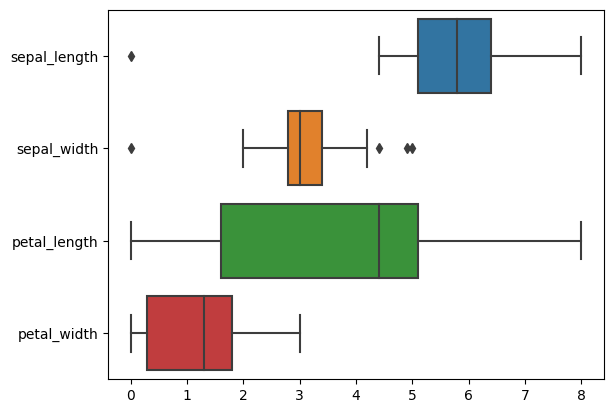

In [10]:
sns.boxplot(data, orient = 'h') #Gráfico de bigotes
plt.show()

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [11]:
#La idea es utilizar el método np.select(), que nos permite evaluar una lista
#de condiciones y asignarles un valor si se cumplen. Caso contrario, la fila
#(el sample) se encuentra dentro del rango
conditions = [
    (data['sepal_length'] < 4.0) | (data['sepal_length'] > 7.0),
    (data['sepal_width'] < 2.0) | (data['sepal_width'] > 4.5),
    (data['petal_length'] < 1.0) | (data['petal_length'] > 7.0),
    (data['petal_width'] < 0.1) | (data['petal_width'] > 2.5),
]

choices = ['Fuera de rango', 'Fuera de rango', 'Fuera de rango', 'Fuera de rango',]

data2 = data.copy()
data2['label'] = np.select(conditions, choices, default = 'En rango')
data2['label'].value_counts()

En rango          129
Fuera de rango     21
Name: label, dtype: int64

In [12]:
data2[data2['label'] == 'Fuera de rango']
#Todos los datos que están fuera de rango se encuentran acá

,sepal_length,sepal_width,petal_length,petal_width,species,label
0,4.4,3.2,1.3,3.0,setosa,Fuera de rango
1,7.2,3.6,6.1,2.5,virginica,Fuera de rango
12,7.7,3.0,6.1,2.3,virginica,Fuera de rango
14,7.7,2.6,6.9,2.3,virginica,Fuera de rango
17,7.7,3.8,6.7,2.2,virginica,Fuera de rango
18,7.6,3.0,6.6,2.1,virginica,Fuera de rango
23,7.1,3.0,5.9,2.1,virginica,Fuera de rango
27,7.7,2.8,6.7,2.0,virginica,Fuera de rango
28,7.9,3.8,6.4,2.0,virginica,Fuera de rango
34,7.4,2.8,6.1,1.9,virginica,Fuera de rango


4. Realice un gráfico de *sepal_length* vs *petal_length* y otro de *sepal_width* vs *petal_width* categorizados por la etiqueta **label**. Concluya sus resultados.

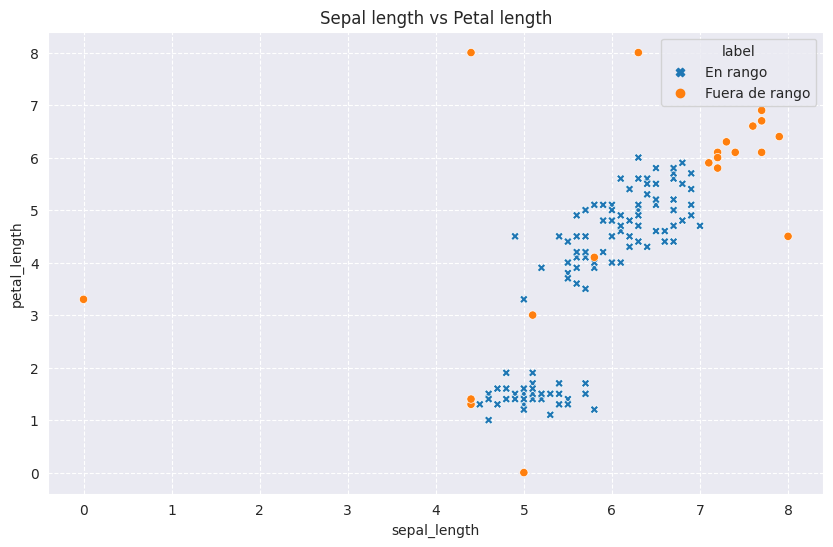

In [13]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid", rc = {'grid.linestyle': '--'})
sns.scatterplot(
    x='sepal_length',
    y='petal_length',
    hue = 'label',
    hue_order = ['En rango', 'Fuera de rango'],
    data = data2,
    #palette = 'seismic',
    style= 'label',
    #style_order = ['En rango', 'Fuera de rango']
)
plt.title('Sepal length vs Petal length')
plt.show()

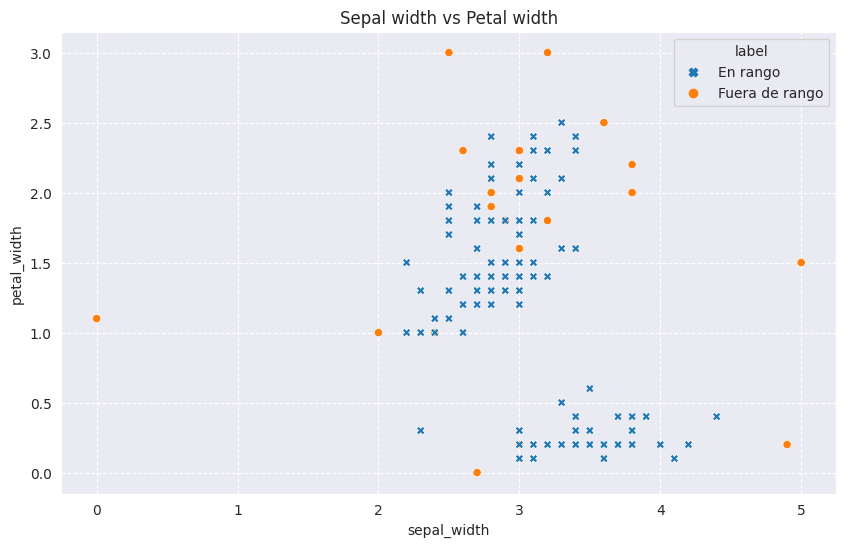

In [14]:
plt.figure(figsize=(10,6))
#plt.style.use('dark_background')
sns.set_style("darkgrid", rc = {'grid.linestyle': '--'})
sns.scatterplot(
    x='sepal_width',
    y='petal_width',
    hue = 'label',
    hue_order = ['En rango', 'Fuera de rango'],
    data = data2,
    #palette = 'seismic',
    style= 'label',
    #style_order = ['En rango', 'Fuera de rango']
)
plt.title('Sepal width vs Petal width')
plt.show()

5. Filtre los datos válidos y realice un gráfico de *sepal_length* vs *petal_length* categorizados por la etiqueta **species**.

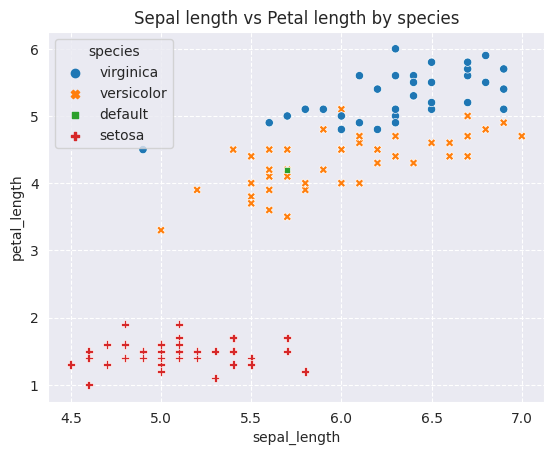

In [15]:
data3 = data2.copy()
data3 = data3[data3['label']=='En rango']
sns.scatterplot(
    data = data3,
    x= 'sepal_length',
    y= 'petal_length',
    hue = 'species',
    #palette = 'hls',
    style = 'species'
)
plt.title('Sepal length vs Petal length by species')
plt.show()
